# Step 1 Data Processing
Apply appropriate techniques to preprocess data (e.g., normalization, standardization)

In [2]:
## Data Processing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

passenger = pd.read_csv("titanic_augmented.csv")

passenger.shape

(891, 26)

In [3]:
passenger.tail(6)
passenger.iloc[:, 0:13]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21


In [4]:
passenger.iloc[:, 13:25]

,title,title_group,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score
0,Mr,Mr,2,0,1,7.250,3.034483,Unknown,NaN,92490,221958,6.134152
1,Mrs,Mrs,2,0,1,71.283,0.533084,C,85.0,15655423,771155,4.182430
2,Miss,Miss,1,1,1,7.925,3.280757,Unknown,NaN,90218500,231932,9.327285
3,Mrs,Mrs,2,0,2,26.550,0.659134,C,123.0,2493079,465838,8.660639
4,Mr,Mr,1,1,1,8.050,4.347826,Unknown,NaN,59517148,359178,0.452187
...,...,...,...,...,...,...,...,...,...,...,...,...
886,Rev,Other,1,1,1,13.000,2.076923,Unknown,NaN,83757278,538661,4.308875
887,Miss,Miss,1,1,1,30.000,0.633333,B,42.0,91664020,498929,2.487143
888,Miss,Miss,4,0,2,11.725,0.000000,Unknown,NaN,55618889,680466,6.171450
889,Mr,Mr,1,1,1,30.000,0.866667,C,148.0,94737372,673695,7.067772


In [5]:
passenger.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,...,891.000000,891.000000,891.000000,891.000000,891,200.00000,8.910000e+02,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,...,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,687,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,...,0.602694,1.787879,17.789001,1.572536,NaN,50.49000,5.108118e+07,536369.988777,4.956762,4.067340
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,...,0.489615,1.361142,21.218127,1.661773,NaN,35.39497,2.838174e+07,261551.630299,2.915177,1.168866
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,...,0.000000,1.000000,0.000000,0.000000,NaN,2.00000,9.249000e+04,102869.000000,0.046320,3.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,...,0.000000,1.000000,7.762500,0.116026,NaN,22.00000,2.831962e+07,299638.000000,2.325861,3.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,...,1.000000,1.000000,8.850000,1.175795,NaN,43.00000,5.128853e+07,535564.000000,4.954913,4.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,...,1.000000,2.000000,24.288000,2.543045,NaN,77.25000,7.493131e+07,757663.000000,7.479345,4.000000


In [6]:
passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  name_length        891 non-null    int64  
 13  title              891 non-null    object 
 14  title_group        891 non-null    object 
 15  family_size        891 non-null    int64  
 16  is_alone           891 non

In [7]:
# Drop Irrelevant, Weak, Redundant Features
drop_cols = [
    "PassengerId",    # identifier
    "Name",           # title already extracted
    "Ticket",         # too high-cardinality
    "Cabin",           # raw cabin string; usually replaced by deck
    "name_length",                  # Too many missing data and it is redundant to the decomposed ones
    "name_word_count",      # Weak predictor
    "title",           # Keep the title_group instead
    "cabin_room_number",
    "booking_reference",
    "service_id"
]

cols_dropping = [col for col in drop_cols if col in passenger.columns]
passenger_clean = passenger.drop(columns=cols_dropping)


# Separate Predictors and Response 
target = "Survived"
X = passenger_clean.drop(columns=[target])
y = passenger_clean[target]

# separate numeric and categories for future pipelining
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

if 'Pclass' in num_features:
    num_features.remove('Pclass')
    cat_features.append('Pclass')

# Pipelining
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_features),
        ('cat', categorical_pipeline, cat_features)
    ]
)

preprocessing_only = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Splitting train/test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y   # preserves class ratio
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Survival rate in full dataset:", y.mean())
print("Survival rate in training set:", y_train.mean())
print("Survival rate in test set:", y_test.mean())

# CV re-sampling
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

#StratifiedKFold(n_splits=10)


# example placeholder for a model
logreg_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),   # from earlier step
    ('model', LogisticRegression(max_iter=1000))
])

# useful in the future
# scores = cross_val_score(
#     logreg_pipeline,
#     X_train,
#     y_train,
#     cv=cv,
#     scoring='accuracy'
# )

# print("CV Accuracy:", scores)
# print("Mean Accuracy:", scores.mean())

##Check for missing value]
# X_check = preprocessing_only.fit_transform(X_train)
# X_check.shape
# np.isnan(X_check).sum()

Training set size: (668, 15)
Test set size: (223, 15)
Survival rate in full dataset: 0.3838383838383838
Survival rate in training set: 0.38323353293413176
Survival rate in test set: 0.38565022421524664


# Step 2 Data Splitting and Resampling
Split the dataset into training and test sets (25% test) and use appropriate resampling techniques (e.g., k-fold cross-validation) to ensure robust model evaluation.

# Step 3 Model Building
## LDA

### Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a supervised classification method that models class-specific means and covariance matrices to identify linear combinations of features that best separate different classes. In this project, LDA serves as a representative linear classifier and provides a theoretical comparison with Logistic Regression.

All preprocessing procedures, including missing value imputation, feature scaling, and categorical encoding, are integrated into a unified pipeline to ensure reproducibility and prevent data leakage.


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- LDA pipeline ---
lda_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),   
    ("model", LinearDiscriminantAnalysis())
])

# --- 5-fold CV on training set ---
lda_cv_scores = cross_val_score(
    lda_pipeline,
    X_train,
    y_train,
    cv=cv,                 
    scoring="accuracy"
)

print("LDA CV Accuracy (folds):", lda_cv_scores)
print("LDA CV Mean Accuracy:", lda_cv_scores.mean())
print("LDA CV Std:", lda_cv_scores.std())

# --- Fit on full training set ---
lda_pipeline.fit(X_train, y_train)

# --- Evaluate on test set ---
y_pred_lda = lda_pipeline.predict(X_test)

print("\nLDA Test Accuracy:", accuracy_score(y_test, y_pred_lda))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda))


LDA CV Accuracy (folds): [0.85820896 0.81343284 0.82835821 0.84210526 0.80451128]
LDA CV Mean Accuracy: 0.8293233082706767
LDA CV Std: 0.019322703426083988

LDA Test Accuracy: 0.8340807174887892

Confusion Matrix:
 [[120  17]
 [ 20  66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       137
           1       0.80      0.77      0.78        86

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



### Hyperparameter Tuning

GridSearchCV with stratified 5-fold cross-validation is applied to optimize LDA hyperparameters. Different solvers and shrinkage parameters are evaluated to improve numerical stability and classification performance. The best-performing configuration is selected based on cross-validation accuracy.


In [9]:
#Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

lda_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LinearDiscriminantAnalysis())
])

param_grid_lda = [
    {"model__solver": ["svd"]},  
    {"model__solver": ["lsqr"],  
     "model__shrinkage": [None, "auto", 0.0, 0.1, 0.3, 0.5, 0.7, 0.9]}
]

grid_lda = GridSearchCV(
    lda_pipeline,
    param_grid_lda,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"  
)

grid_lda.fit(X_train, y_train)

print("Best LDA params:", grid_lda.best_params_)
print("Best CV accuracy:", grid_lda.best_score_)

Best LDA params: {'model__solver': 'svd'}
Best CV accuracy: 0.8293233082706767


### Model Evaluation

The optimized LDA model is evaluated on an independent test set. Classification accuracy, confusion matrix, and precision-recall metrics are reported to assess model generalization performance and class-wise prediction behavior.


In [10]:
#Test set accuracy + confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_lda = grid_lda.best_estimator_

y_pred_lda = best_lda.predict(X_test)

print("LDA Test Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("Report:\n", classification_report(y_test, y_pred_lda))


LDA Test Accuracy: 0.8340807174887892
Confusion Matrix:
 [[120  17]
 [ 20  66]]
Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       137
           1       0.80      0.77      0.78        86

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



## Random Forest

### RF baseline (5-fold Stratified CV on training set)

we trained a baseline RF classifier using a preprocessing + model pipline, and evaluated its expected generalization performance using 5-fold Stratified cross_validation on the training set only (seed =42).

cross_val_score fits the full pipeline from scratch in each fold, meaning that imputation/encoding (and scaling, if included) are learned only from the fold's training portion, which helps prevent data leakage.

The 5 fold accuracies were [0.79850746 0.84328358 0.84328358 0.82706767 0.79699248], giving a mean CV accuracy of 82% with sd 2.05%.

This mean score serves as our baseline benchmark for later hyperparameter tuning and feature reduction (small yet performant), while the relatively small standard deviation indicates the model performance is fairly stable across folds.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#random forest baseline pipline
rf_pipline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1))
])

rf_scores = cross_val_score(
    rf_pipline,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

print("RF CV scores:", rf_scores)
print("RF Mean CV accuracy:", rf_scores.mean())
print("RF Std CV accuracy:", rf_scores.std())

RF CV scores: [0.79850746 0.84328358 0.84328358 0.82706767 0.79699248]
RF Mean CV accuracy: 0.8218269554483222
RF Std CV accuracy: 0.020536740674665727


### Random Forest Hyperparameter Tuning

We tuned the RF classifier using RandomizedSearchCV with 5-fold stratified CV on the training set only. The best configuration achieved a mean CV accuracy of 83.53%, improving over the baseline RF mean CV accuracy (82.18%).

The selected hyperparameters suggest a variance-reduction + regularization trade-off: using a large number of trees (n_estimators=1200) stabilizes the ensemble, while constraints on node splitting (min_samples_split=10, min_samples_leaf=2) reduce overfitting from overly specific splits. 

In addition, max_features=0.5 increases tree diversity by limiting the candidate predictors considered at each split, reducing correlation between trees and improving the effectiveness of majority voting.

The best model did not required class reweighting (class_weight=None), indicating that accuracy performance was strongest without additional imbalance correction.

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#preprocessing + RF
rf_pipeline = Pipeline(steps = [
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# check p before one-hot encoding
p_raw = X_train.shape[1]
print("p (raw features):", p_raw)

# p after after one-hot 
X_train_transformed = preprocessor.fit_transform(X_train)
p_after = X_train_transformed.shape[1]
print("p (after preprocessing):", p_after)

#Hyperparameter search space (moderate size, good chance to improve baseline)
param_dist = {
    "model__n_estimators": [300, 500, 800, 1200], # more trees => more stable, slower
    "model__max_depth": [None, 5, 10, 20, 30],    # tree complexity control
    "model__min_samples_leaf": [1, 2, 5, 10],     # larger leaf => less overfitting
    "model__min_samples_split": [2, 5, 10],       # prevents tiny splits
    "model__max_features": ["sqrt", 0.3, 0.5],    # RF key: randomness per split
    "model__class_weight": [None, "balanced"]     # optional for imbalance
}

rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist,
    n_iter=30,             
    scoring="accuracy",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train)
print("Best CV accuracy:", rf_search.best_score_)
print("Best params:", rf_search.best_params_)

p (raw features): 15
p (after preprocessing): 32
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best CV accuracy: 0.8353046796094714
Best params: {'model__n_estimators': 1200, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_features': 0.5, 'model__max_depth': 30, 'model__class_weight': None}


### tuned RF + get features names + importance ranking

Using the tuned Random Forest, we ranked all transformed features (after one-hot encoding) by the model’s built-in impurity-based feature_importances_. The top-ranked features include title group (e.g., Mr), sex, fare-related variables, cabin-related variables, age, and passenger class, which are consistent with key survival factors.


In [13]:
import numpy as np
import pandas as pd
from sklearn.base import clone

# Use tuned best pipeline from Step 3
best_rf = rf_search.best_estimator_     
best_rf.fit(X_train, y_train)

# Get feature names after preprocessing (one-hot expands)
feature_names = best_rf.named_steps["preprocessing"].get_feature_names_out()

# Get RF built-in feature importance (impurity-based)
rf_model = best_rf.named_steps["model"]
importances = rf_model.feature_importances_

imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print("Top 15 important features:")
display(imp_df.head(15))


Top 15 important features:


,feature,importance
17,cat__title_group_Mr,0.185869
11,cat__Sex_male,0.111243
10,cat__Sex_female,0.107427
7,num__fare_per_person,0.092487
9,num__cabin_score,0.076581
3,num__Fare,0.071610
0,num__Age,0.070291
8,num__age_fare_ratio,0.059652
31,cat__Pclass_3,0.043475
6,num__ticket_group_size,0.030258


### Top-k features sweep

We then performed a simple top-k sweep: starting from the most important features, we retrained the RF using only the top-k transformed features and evaluated performance using 5-fold stratified CV on the training set. Accuracy increased as k grew, and peaked at k=24 with mean CV accuracy 0.8353.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# transform training set once (after preprocessing)
Xt_train = best_rf.named_steps["preprocessing"].fit_transform(X_train, y_train)

# Create top indices based on sorted importance
top_idx = np.argsort(importances)[::-1]   

# 3) Use the tuned RF params to create a model (same as best model)
best_params = rf_search.best_params_
rf_tuned = RandomForestClassifier(
    n_estimators=best_params["model__n_estimators"],
    max_depth=best_params["model__max_depth"],
    min_samples_split=best_params["model__min_samples_split"],
    min_samples_leaf=best_params["model__min_samples_leaf"],
    max_features=best_params["model__max_features"],
    class_weight=best_params["model__class_weight"],
    random_state=42,
    n_jobs=-1
)

# 4) Try different k 
k_list = [5, 8, 10, 12, 16, 20, 24, 28, 32]

rows = []
for k in k_list:
    cols = top_idx[:k]
    Xt_k = Xt_train[:, cols]

    scores = cross_val_score(rf_tuned, Xt_k, y_train, cv=cv, scoring="accuracy")
    rows.append({
        "k": k,
        "cv_mean_acc": scores.mean(),
        "cv_std": scores.std()
    })

results_df = pd.DataFrame(rows)
display(results_df)


,k,cv_mean_acc,cv_std
0,5,0.806913,0.018246
1,8,0.818887,0.017747
2,10,0.827820,0.017352
3,12,0.827797,0.019974
4,16,0.829312,0.017010
5,20,0.829335,0.016091
6,24,0.835327,0.016453
7,28,0.833812,0.016234
8,32,0.832297,0.017822


### pick smallest K within tolerance

With a tolerance of 0.005 (0.5%) from the best CV score, we selected k=24 as the smallest feature set meeting this threshold. Since the transformed feature space has 32 features, this reduces the feature set by 25% while keeping CV performance nearly unchanged.

In [15]:

tolerance = 0.005  # allow up to 0.5% drop from the best CV mean accuracy

best_mean = results_df["cv_mean_acc"].max()
threshold = best_mean - tolerance

# choose the smallest k whose mean accuracy >= threshold
best_k = int(
    results_df[results_df["cv_mean_acc"] >= threshold]
    .sort_values("k")
    .iloc[0]["k"]
)

print("Best CV mean accuracy:", best_mean)
print("Threshold (best - tolerance):", threshold)
print("Chosen smallest k:", best_k)


Best CV mean accuracy: 0.8353271237795983
Threshold (best - tolerance): 0.8303271237795983
Chosen smallest k: 24


### Final evaluation on the test set

After selecting k=24, we refit preprocessing on the full training set, trained the tuned RF on the top-k features, and evaluated once on the held-out test set. The top-k model achieved test accuracy = 0.8117 with confusion matrix \[122,15,27,59]. This indicates the model makes relatively few false positives (15), while some survivors are predicted as non-survivors (27), suggesting recall for the Survived class is lower than precision.

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Transform train/test using preprocessing (fit on train only)
Xt_train = best_rf.named_steps["preprocessing"].fit_transform(X_train, y_train)
Xt_test  = best_rf.named_steps["preprocessing"].transform(X_test)

# Select top-k columns
cols = top_idx[:best_k]
Xt_train_k = Xt_train[:, cols]
Xt_test_k  = Xt_test[:, cols]

# Fit tuned RF on reduced features
rf_tuned.fit(Xt_train_k, y_train)

# Predict on test
y_pred = rf_tuned.predict(Xt_test_k)

print("Test accuracy (top-k):", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Test accuracy (top-k): 0.8116591928251121
Confusion matrix:
 [[122  15]
 [ 27  59]]


## Random Forest (RF) Summary

### Setup
- Train/test split: 75/25 with `stratify=y`, `random_state=42`
- 5-fold Stratified CV (`shuffle=True`, `random_state=42`)
- Preprocessing: median imputation for numeric, most-frequent imputation + one-hot encoding for categorical features

### Step 2 — RF Baseline (CV on training set)
- CV accuracy scores: [0.7985, 0.8433, 0.8433, 0.8271, 0.7970]
- Mean CV accuracy = **0.8218**, Std = **0.0205**

### Step 3 — RF Hyperparameter Tuning (RandomizedSearchCV)
- 30 random candidates × 5 folds = 150 total fits (train-only CV)
- Best mean CV accuracy = **0.8353**
- Best params:
  - `n_estimators=1200`, `max_depth=30`, `min_samples_split=10`, `min_samples_leaf=2`,
  - `max_features=0.5`, `class_weight=None`

### Step 4 — Small yet performant (Top-k feature reduction)
- Feature count:
  - p (raw) = **15**
  - p (after preprocessing) = **32**
- Used RF built-in `feature_importances_` to rank transformed features (e.g., title group, sex, fare, cabin, age, Pclass)
- Top-k sweep (5-fold CV):
  - Best mean CV accuracy = **0.8353**
  - Tolerance = **0.005** (0.5 percentage points)
  - Threshold = **0.8303**
  - Chosen smallest k within tolerance = **24**
- This reduces transformed features from **32 → 24** (**25% reduction**) while keeping CV performance near the best.

### Final Test Evaluation (Top-k model)
- Test accuracy (k=24) = **0.8117**
- Confusion matrix:
  - [[122, 15],
     [27, 59]]
  - The model makes relatively few false positives (15), while some survivors are predicted as non-survivors (27).


## Method

We trained a Random Forest classifier to predict passenger survival. The dataset was split into training and test sets using a 75/25 split with stratification on the target label (random_state=42). All model selection steps were performed on the training set only using 5-fold Stratified cross-validation (shuffle=True, seed=42). Preprocessing was implemented using a pipeline: numeric features were median-imputed, categorical features were imputed with the most frequent category and one-hot encoded. We first established a baseline RF using CV, then tuned hyperparameters with RandomizedSearchCV (30 random candidates evaluated by 5-fold CV, totalling 150 fits). Finally, to support the project goal of building a “small yet performant” model, we ranked transformed features using the tuned RF’s built-in impurity-based feature importance (feature_importances_) and performed a top-k feature sweep. We selected the smallest k whose mean CV accuracy was within a tolerance of 0.005 (0.5 percentage points) of the best observed CV score.

## Result

The baseline Random Forest achieved mean CV accuracy 0.8218 (std 0.0205) on the training set. After tuning, the best model achieved mean CV accuracy 0.8353 with parameters: n_estimators=1200, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=0.5, class_weight=None. After preprocessing, the model operated on 32 transformed features (from 15 raw predictors). Using the importance ranking and top-k sweep, we found that k=24 features achieved the best observed mean CV accuracy (0.8353) and was also the smallest k within the tolerance threshold (0.8303), reducing the transformed feature set from 32 to 24 (a 25% reduction) while maintaining near-peak CV performance. The final top-k model achieved test accuracy = 0.8117 with confusion matrix \[122,15,27,59], indicating relatively few false positives but a moderate number of false negatives for the Survived class.

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#### Step 1 Start with pipeling for LogReg

In [18]:

logreg_pipe = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

#### Step 2 The baseline cross-validation result before tuning step

In [19]:

logreg_cv_scores = cross_val_score(
    logreg_pipe,
    X_train,
    y_train,
    cv=cv,
    scoring='accuracy'
)

print("Baseline Logistic Regression Cross-Validate scores:", logreg_cv_scores)
print("Mean Cross-Validate accuracy:", logreg_cv_scores.mean())

Baseline Logistic Regression Cross-Validate scores: [0.84328358 0.82835821 0.85074627 0.85714286 0.78947368]
Mean Cross-Validate accuracy: 0.8338009202109753


The model performs consistently across folds, with scores mostly between 0.82–0.86 with one that is 0.7895 indicates some variance but no harm overall.

So, given the result from the basaline CV, the model achieved a mean accuracy of 83.4% and a relatively small variance across folds. This could mean that the linear decision boundary generalizes well in a reasonable indicator and that the augmented features provide good linear separatbility between survivors and those who did not.

#### Step 3 Making Hyperparameter Tuning for the model

In [20]:
import warnings
warnings.filterwarnings('ignore')

logreg_param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

logreg_grid = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=logreg_param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

logreg_grid.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=1000))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__C': [0.01, 0.1, ...], 'model__penalty': ['l2'], 'model__solver': ['lbfgs', 'liblinear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and 

In [21]:
## View the Best performance of the model fitting
print("Best parameters:", logreg_grid.best_params_)
print("Best CV accuracy:", logreg_grid.best_score_)

Best parameters: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best CV accuracy: 0.8353159016945348


With the best value of 10, this tells us that the model performs best with weaker regularization, and it means the data itself is reliable enough with strong and indicative features. This is also why L2 penalty is being used here.  
So the grid search result indicated tha C=10 applying L2 regularization with lbfgs solve can improve the CV accuracy to 83.5%.

#### Step 4 Tuned Model Evaluation on Test Data

In [22]:
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg_best = logreg_grid.best_estimator_

y_pred_lr = logreg_best.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Test Accuracy: 0.8251121076233184

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       137
           1       0.77      0.78      0.77        86

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223


Confusion Matrix:
 [[117  20]
 [ 19  67]]


- Final Test: The tuned Logistic Regression model achieved a test accuracy of 82.5%, closely matching its cross-validation performance. This consistency indicates that the model generalizes well on unseen data and that no substantial overfitting is present.  

- Classification Report: The model shows stronger performance for predicting non-survivors (F1 = 0.86) than survivors (F1 = 0.77), reflecting the class imbalance in the dataset and the linear nature of the classifier. Despite this, recall for the positive class (0.78) indicates that the model is reasonably effective at identifying survivors.  

- Confusion Matrix: 
    - 117 true negatives — correctly predicted deaths
    - 67 true positives — correctly predicted survivors
    - 20 false positives — predicted survived but actually died
    - 19 false negatives — predicted died but actually survived

The confusion matrix shows balanced error rates across both classes, with 19 false negatives and 20 false positives. The model captures the underlying survival patterns well without disproportionately favoring one class.

#### Step 5 ROC Curve and AUC

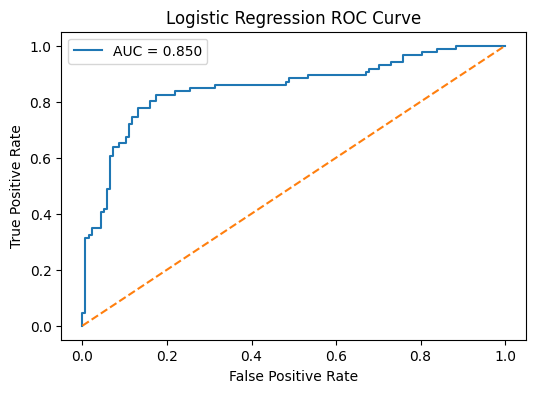

In [23]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

y_pred_proba = logreg_best.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.show()


- AUC of 0.85 is considered strong.
- Indicates good ranking ability: survivors generally receive higher predicted probabilities than non-survivors.
- Confirms that Logistic Regression captures meaningful separation even when linear.
\
\
The ROC curve demonstrates strong discriminative ability with an AUC of 0.85, indicating that the model assigns higher survival probabilities to true survivors most of the time. This suggests that the linear decision boundary is effective for ranking passenger risk.

# Last Step Final Summary
Logistic Regression produced a strong linear baseline for the Titanic classification task. The baseline model achieved a mean cross-validated accuracy of 83.3%, and after hyperparameter tuning, the optimal configuration (C = 10, L2 penalty, lbfgs solver) improved performance slightly to 83.5%. The test accuracy (82.5%) closely matched the CV results, indicating stable generalization and no overfitting. The classification report shows better performance on the majority class (non-survivors), although recall for survivors remained reasonably high (0.78). The ROC-AUC score of 0.85 further confirms strong discriminative ability. Overall, Logistic Regression provides a reliable and interpretable baseline model that effectively leverages the engineered features in the augmented dataset.